<b>EDA</b>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv(r'C:\Users\jimmy\Documents\Tài liệu\vital docs\Side Project\Breast_Cancer_Detecting\Data\VinDR\breast-level_annotations.csv')


In [17]:
df.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,split
0,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,L,CC,3518,2800,BI-RADS 2,DENSITY C,training
1,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,L,MLO,3518,2800,BI-RADS 2,DENSITY C,training
2,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,R,CC,3518,2800,BI-RADS 2,DENSITY C,training
3,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,R,MLO,3518,2800,BI-RADS 2,DENSITY C,training
4,8269f5971eaca3e5d3772d1796e6bd7a,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,L,CC,3518,2800,BI-RADS 1,DENSITY C,training


In [18]:
df.describe(include='all')

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,split
count,20000,20000,20000,20000,20000,20000.000000,20000.000000,20000,20000,20000
unique,5000,5036,20000,2,2,NaN,NaN,5,4,2
top,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,cd3f03d63ac652dbf7f38d7ea0724a9c,L,CC,NaN,NaN,BI-RADS 1,DENSITY C,training
freq,4,4,1,10000,10001,NaN,NaN,13406,15292,16000
mean,NaN,NaN,NaN,NaN,NaN,3386.977200,2647.476500,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,278.611866,308.275842,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2812.000000,2012.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3518.000000,2800.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3518.000000,2800.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3518.000000,2800.000000,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   study_id        20000 non-null  object
 1   series_id       20000 non-null  object
 2   image_id        20000 non-null  object
 3   laterality      20000 non-null  object
 4   view_position   20000 non-null  object
 5   height          20000 non-null  int64 
 6   width           20000 non-null  int64 
 7   breast_birads   20000 non-null  object
 8   breast_density  20000 non-null  object
 9   split           20000 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.5+ MB


In [20]:
df['breast_birads'].value_counts()

breast_birads
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 3      930
BI-RADS 4      762
BI-RADS 5      226
Name: count, dtype: int64

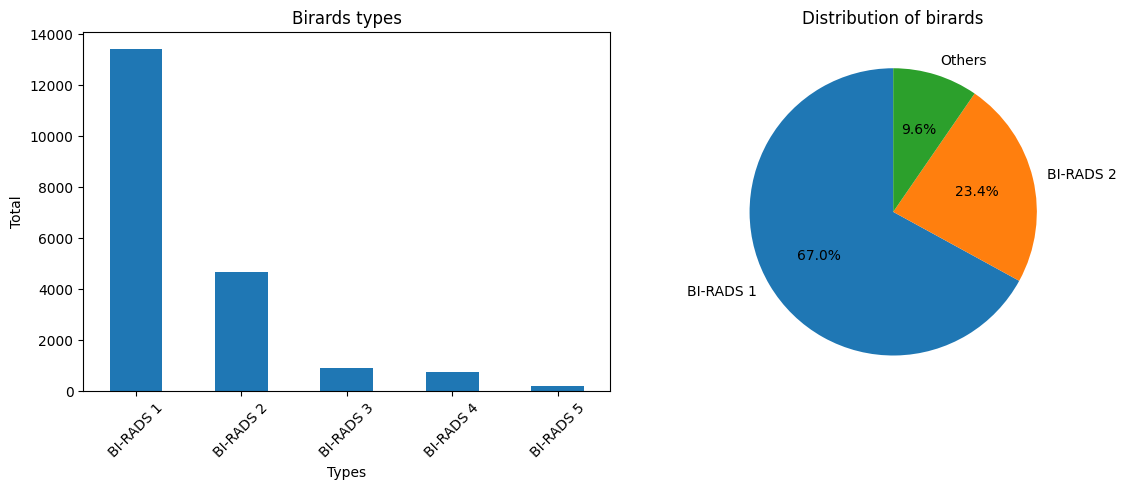

In [30]:
sharing = df['breast_birads'].value_counts()
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sharing.plot(kind='bar', rot=45)
plt.title('Birards types')
plt.xlabel('Types')
plt.xticks(rotation=45)
plt.ylabel('Total')

#Merge those birards account for less than 5%
total = sharing.sum()
threshold = 0.05
big = sharing[sharing/total >= threshold].copy()
other = sharing[sharing/total < threshold].sum()
big['Others'] = other

plt.subplot(1,2,2)
big.plot.pie(autopct='%1.1f%%', startangle=90 )
plt.title('Distribution of birards')
plt.ylabel('') 

plt.tight_layout()
plt.show()

In [31]:
df['breast_density'].value_counts()

breast_density
DENSITY C    15292
DENSITY D     2700
DENSITY B     1908
DENSITY A      100
Name: count, dtype: int64

In [35]:
#Validate patient's set of image (4 for each)

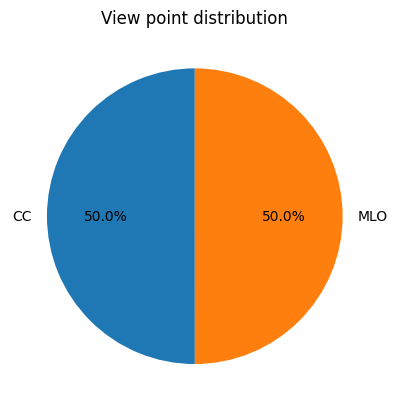

In [37]:
df['view_position'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('View point distribution')
plt.ylabel('')
plt.show()

In [39]:
df['series_id'].unique

<bound method Series.unique of 0        b36517b9cbbcfd286a7ae04f643af97a
1        b36517b9cbbcfd286a7ae04f643af97a
2        b36517b9cbbcfd286a7ae04f643af97a
3        b36517b9cbbcfd286a7ae04f643af97a
4        d931832a0815df082c085b6e09d20aac
                       ...               
19995    2b1b2b8f48abab9819c0b3d091e152ee
19996    69d7f07ea04572dad5e5aa62fbcfc4b7
19997    69d7f07ea04572dad5e5aa62fbcfc4b7
19998    69d7f07ea04572dad5e5aa62fbcfc4b7
19999    69d7f07ea04572dad5e5aa62fbcfc4b7
Name: series_id, Length: 20000, dtype: object>

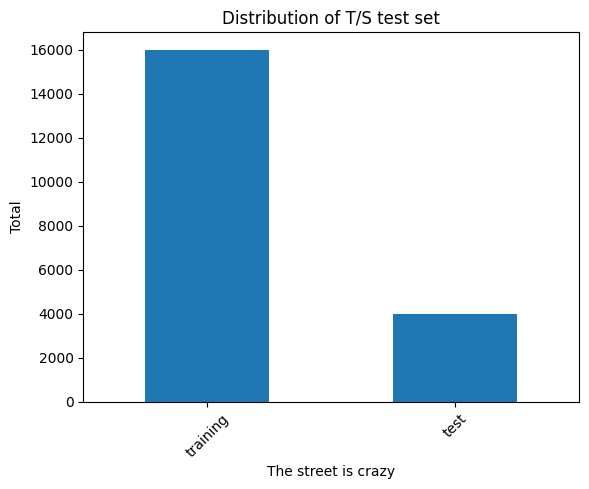

In [41]:
df['split'].value_counts().plot(kind='bar', rot=45)
plt.title('Distribution of T/S test set')
plt.xlabel('The street is crazy')
plt.ylabel('Total')
plt.show()

In [ ]:
# Set plotting style
sns.set(style="whitegrid")

# 2a) BI-RADS Categories Analysis

# Check consistency of BI-RADS across left/right breasts in the same study
inconsistent_birads = df.groupby('study_id').filter(
    lambda x: x['breast_birads'].nunique() > 1
)[['study_id', 'laterality', 'breast_birads']].drop_duplicates()
print("\nStudies with Inconsistent BI-RADS Across Breasts:")
print(inconsistent_birads.head(10))

#Count total pairs


Studies with Inconsistent BI-RADS Across Breasts:
                            study_id laterality breast_birads
24  cca141f804a8ab8b584d63102bc7f3f7          L     BI-RADS 3
26  cca141f804a8ab8b584d63102bc7f3f7          R     BI-RADS 1
28  9ec3039bf215173edf48a8b4f23ad56a          L     BI-RADS 4
30  9ec3039bf215173edf48a8b4f23ad56a          R     BI-RADS 1
32  2c314c0a8f364d1a8889bb555d3d04c9          L     BI-RADS 1
34  2c314c0a8f364d1a8889bb555d3d04c9          R     BI-RADS 2
36  7ee98232df9bcefc6b54530b6a616690          L     BI-RADS 3
38  7ee98232df9bcefc6b54530b6a616690          R     BI-RADS 2
40  522963c771a84cb777c49ba7a4ca69fc          L     BI-RADS 1
42  522963c771a84cb777c49ba7a4ca69fc          R     BI-RADS 2


In [59]:
#Amount of inconsistent pairs
inconsistent_birads.nunique().sum()

np.int64(1998)

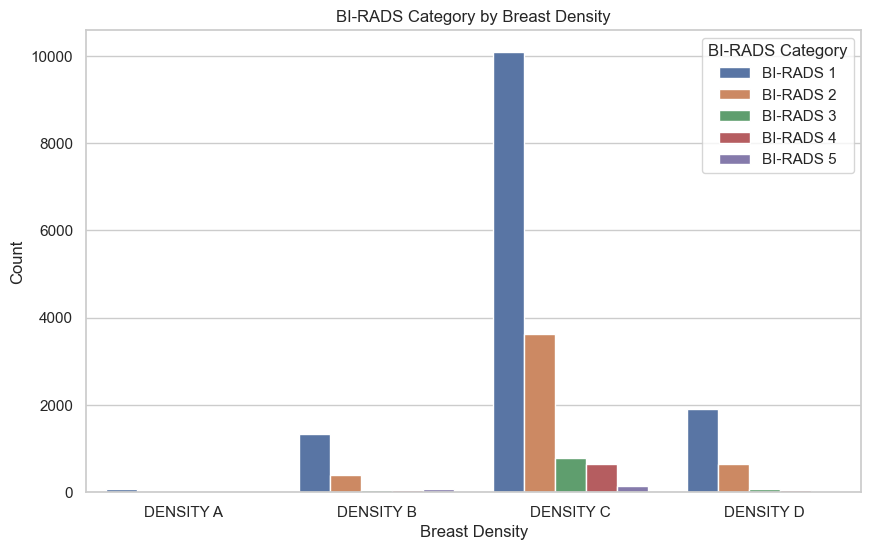

In [ ]:
# Correlation between density and BI-RADS scores
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='breast_density', hue='breast_birads',
              order=['DENSITY A', 'DENSITY B', 'DENSITY C', 'DENSITY D'],
              hue_order=['BI-RADS 1', 'BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])
plt.title('BI-RADS Category by Breast Density')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.legend(title='BI-RADS Category')
plt.show() #make heat map for Correlation between BI-RADS and breast density

In [52]:
# 2c) View Position Analysis
# Verify each study has both CC and MLO views
study_views = df.groupby('study_id')[['laterality', 'view_position']].apply(
    lambda x: set(x['laterality'] + '-' + x['view_position'])
).reset_index(name='views')
expected_views = {'L-CC', 'L-MLO', 'R-CC', 'R-MLO'}
missing_views = study_views[~study_views['views'].apply(lambda x: expected_views.issubset(x))]
print("\nStudies Missing Standard Views (L-CC, L-MLO, R-CC, R-MLO):")
print(missing_views)


Studies Missing Standard Views (L-CC, L-MLO, R-CC, R-MLO):
                              study_id                views
4275  dbca9d28baa3207b3187c4d07dc81a80  {L-CC, R-CC, R-MLO}


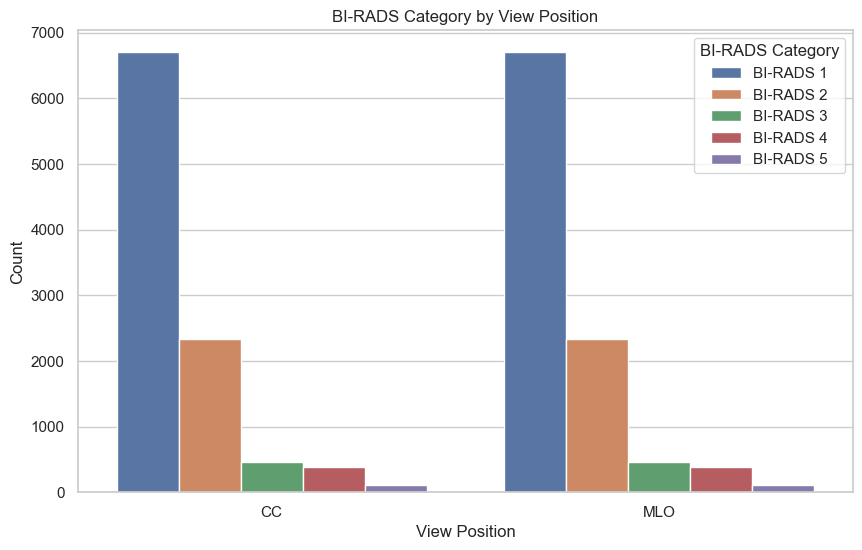

In [53]:
# Check if BI-RADS scores differ by view
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='view_position', hue='breast_birads',
              hue_order=['BI-RADS 1', 'BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])
plt.title('BI-RADS Category by View Position')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.legend(title='BI-RADS Category')
plt.show()

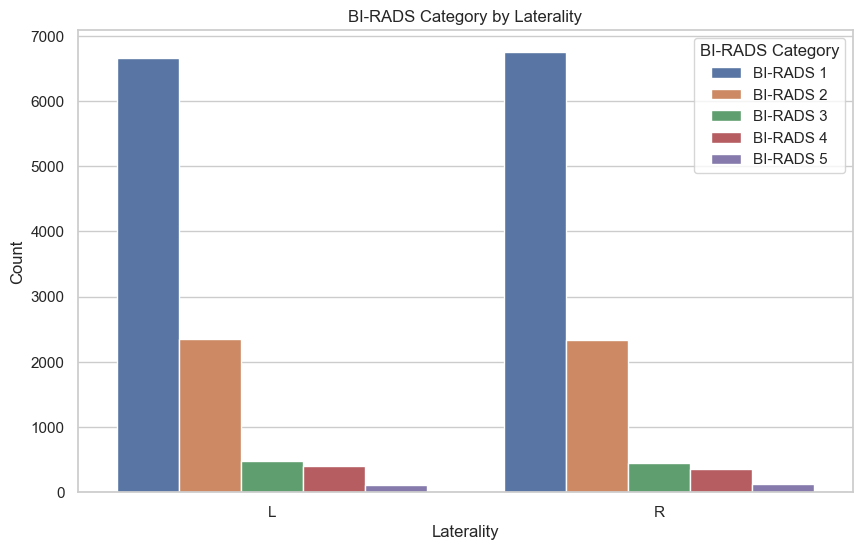

In [54]:
# Compare BI-RADS scores between left and right breasts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='laterality', hue='breast_birads',
              hue_order=['BI-RADS 1', 'BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])
plt.title('BI-RADS Category by Laterality')
plt.xlabel('Laterality')
plt.ylabel('Count')
plt.legend(title='BI-RADS Category')
plt.show()

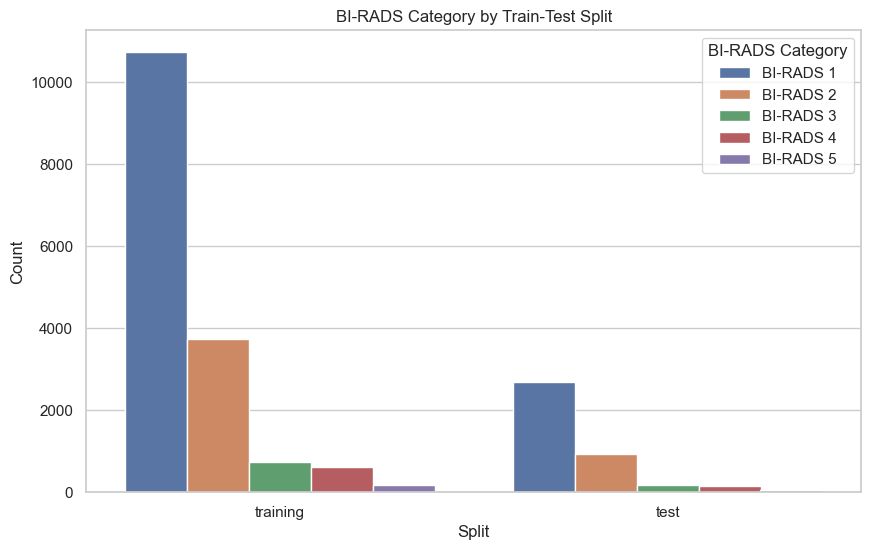

In [55]:
# Ensure similar distribution of BI-RADS and density in training/test sets
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='split', hue='breast_birads',
              hue_order=['BI-RADS 1', 'BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])
plt.title('BI-RADS Category by Train-Test Split')
plt.xlabel('Split')
plt.ylabel('Count')
plt.legend(title='BI-RADS Category')
plt.show()